In [ ]:
import pandas as pd
import ast

### EDA & Cleaning

In [ ]:
credits = pd.read_csv("/content/credits.csv", engine='python',on_bad_lines='skip')
keywords = pd.read_csv("/content/keywords.csv",on_bad_lines='skip')
links = pd.read_csv("/content/links.csv",on_bad_lines='skip')
links_small = pd.read_csv("/content/links_small.csv",on_bad_lines='skip')
movies_metadata = pd.read_csv("/content/movies_metadata.csv", low_memory=False)
ratings_small = pd.read_csv("/content/ratings_small.csv",on_bad_lines='skip')

#  on_bad_lines='skip' remove any row not complete or contain problems

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# تحويل الجسون ل ليسيت
credits['cast'] = credits['cast'].apply(ast.literal_eval)
credits['crew'] = credits['crew'].apply(ast.literal_eval)


In [ ]:
if 'id' in credits.columns:
    credits.rename(columns={'id': 'movie_id'}, inplace=True)
else:
    credits['movie_id'] = credits.index

In [ ]:

records = []


for _, row in credits.iterrows():
    movie_id = row['movie_id']

    # معالجة الممثلين (cast)
    for actor in row['cast']:
        actor['movie_id'] = movie_id
        actor['role_type'] = 'cast'
        records.append(actor)

    # معالجة طاقم العمل (crew)
    for crew_member in row['crew']:
        crew_member['movie_id'] = movie_id
        crew_member['role_type'] = 'crew'
        records.append(crew_member)

In [ ]:
credits=pd.DataFrame(records)

In [ ]:
credits = credits[['movie_id', 'name', 'job', 'character', 'order', 'role_type','gender']]

#'cast_id', 'credit_id', 'profile_path' #not useful in analysis


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026788 entries, 0 to 1026787
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   movie_id   1026788 non-null  int64  
 1   name       1026788 non-null  object 
 2   job        464314 non-null   object 
 3   character  562474 non-null   object 
 4   order      562474 non-null   float64
 5   role_type  1026788 non-null  object 
 6   gender     1026788 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ MB


In [ ]:
credits.isnull().sum()

,0
movie_id,0
name,0
job,562474
character,464314
order,464314
role_type,0
gender,0


In [ ]:
credits.tail(10)

,movie_id,name,job,character,order,role_type,gender
1026778,67758,Richard McHugh,Original Music Composer,NaN,NaN,crew,0
1026779,67758,João Fernandes,Director of Photography,NaN,NaN,crew,2
1026780,227506,Iwan Mosschuchin,NaN,,0.0,cast,2
1026781,227506,Nathalie Lissenko,NaN,,1.0,cast,1
1026782,227506,Pavel Pavlov,NaN,,2.0,cast,2
1026783,227506,Aleksandr Chabrov,NaN,,3.0,cast,0
1026784,227506,Vera Orlova,NaN,,4.0,cast,1
1026785,227506,Yakov Protazanov,Director,NaN,NaN,crew,0
1026786,227506,Joseph N. Ermolieff,Producer,NaN,NaN,crew,2
1026787,461257,Daisy Asquith,Director,NaN,NaN,crew,0


In [ ]:
cast=credits[credits['role_type']=='cast'][['movie_id','name','character','order','gender']]
cast=pd.DataFrame(cast)

In [ ]:
crew=credits[credits['role_type']=='crew'][['movie_id','name','job','gender']]
crew=pd.DataFrame(crew)

In [ ]:
credits.groupby('role_type').count()
# cast has no job
# crew has no character and order

,movie_id,name,job,character,order,gender
role_type,,,,,,
cast,562474,562474,0,562474,562474,562474
crew,464314,464314,464314,0,0,464314


In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords['keywords']=keywords['keywords'].apply(ast.literal_eval)

In [ ]:
if 'id' in keywords.columns:
    keywords.rename(columns={'id': 'movie_id'}, inplace=True)
else:
    keywords['movie_id'] = keywords.index

In [ ]:
keywords.head()

,movie_id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords = keywords.explode('keywords') # explode() each row contain one dictionary


In [ ]:
keywords.head()

,movie_id,keywords
0,862,"{'id': 931, 'name': 'jealousy'}"
0,862,"{'id': 4290, 'name': 'toy'}"
0,862,"{'id': 5202, 'name': 'boy'}"
0,862,"{'id': 6054, 'name': 'friendship'}"
0,862,"{'id': 9713, 'name': 'friends'}"


In [ ]:
# dictionaryتفكيك ال
keywords = pd.concat([
    keywords.drop(columns=['keywords']),
    keywords['keywords'].apply(pd.Series)
], axis=1)

In [ ]:
keywords.head()

,movie_id,id,name,0
0,862,931.0,jealousy,NaN
0,862,4290.0,toy,NaN
0,862,5202.0,boy,NaN
0,862,6054.0,friendship,NaN
0,862,9713.0,friends,NaN


In [ ]:
keywords.rename(columns={'name': 'keyword_name'}, inplace=True)

In [ ]:
keywords=keywords[['movie_id','keyword_name']]

In [ ]:
keywords.head()

,movie_id,keyword_name
0,862,jealousy
0,862,toy
0,862,boy
0,862,friendship
0,862,friends


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173475 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie_id      173475 non-null  int64 
 1   keyword_name  158680 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.0+ MB


In [ ]:
keywords.isnull().sum()

,0
movie_id,0
keyword_name,14795


In [ ]:
keywords = keywords.dropna(subset=['keyword_name'])


In [ ]:
keywords['keyword_name'].value_counts().head()

,count
keyword_name,
woman director,3115
independent film,1930
murder,1308
based on novel,835
musical,734


In [ ]:
keywords.groupby('movie_id')['keyword_name'].count().sort_values(ascending=False)

,keyword_name
movie_id,
23160,149
117483,113
26390,97
16825,83
36536,81
...,...
451644,1
450945,1
35619,1


In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#rename id to movie_id
movies_metadata.rename(columns={'id': 'movie_id'}, inplace=True)

In [ ]:
#change datatypes in budget,release_data and revenue
movies_metadata['movie_id']=pd.to_numeric(movies_metadata['movie_id'], errors='coerce')

movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

movies_metadata['budget']=pd.to_numeric(movies_metadata['budget'], errors='coerce')

movies_metadata['revenue']=pd.to_numeric(movies_metadata['revenue'], errors='coerce')

movies_metadata['popularity']=pd.to_numeric(movies_metadata['popularity'], errors='coerce')

movies_metadata['vote_average']=pd.to_numeric(movies_metadata['vote_average'], errors='coerce')

movies_metadata['vote_count']=pd.to_numeric(movies_metadata['vote_count'], errors='coerce')

movies_metadata['runtime']=pd.to_numeric(movies_metadata['runtime'], errors='coerce')


In [ ]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,movie_id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   movie_id               45463 non-null  float64       
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [ ]:
movies_metadata.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,3
genres,0
homepage,37684
movie_id,3
imdb_id,17
original_language,11
original_title,0
overview,954


In [ ]:
#الافلام التي لا تنتمي لسلسلة افلام اخرى
movies_metadata['belongs_to_collection'].fillna('Not part of a collection', inplace=True)

/tmp/ipython-input-3788114903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['belongs_to_collection'].fillna('Not part of a collection', inplace=True)


In [ ]:
#not useful in analysis and contains many of null values
movies_metadata.drop(columns=['homepage'],inplace=True)

In [ ]:
#change id to movie_id
if 'id' in movies_metadata.columns:
    movies_metadata.rename(columns={'id': 'movie_id'}, inplace=True)
else:
    movies_metadata['movie_id'] = movies_metadata.index

In [ ]:
# 3 null values in budget replace it with median
movies_metadata['budget'].fillna(movies_metadata['budget'].median(), inplace=True)

/tmp/ipython-input-614549705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['budget'].fillna(movies_metadata['budget'].median(), inplace=True)


In [ ]:
# drop 17 null values in imdb_id
movies_metadata.dropna(subset=['imdb_id'], inplace=True)

In [ ]:
#fill null values in original_language by mode()
movies_metadata['original_language'].fillna(movies_metadata['original_language'].mode()[0], inplace=True)

/tmp/ipython-input-1623392836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['original_language'].fillna(movies_metadata['original_language'].mode()[0], inplace=True)


In [ ]:
movies_metadata['overview'].fillna(movies_metadata['overview'].mode()[0], inplace=True)

/tmp/ipython-input-1491415785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['overview'].fillna(movies_metadata['overview'].mode()[0], inplace=True)


In [ ]:
#not useful in analysis
movies_metadata.drop(columns=['poster_path'],inplace=True)

In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45449 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45449 non-null  object        
 1   belongs_to_collection  45449 non-null  object        
 2   budget                 45449 non-null  float64       
 3   genres                 45449 non-null  object        
 4   movie_id               45449 non-null  int64         
 5   imdb_id                45449 non-null  object        
 6   original_language      45449 non-null  object        
 7   original_title         45449 non-null  object        
 8   overview               45449 non-null  object        
 9   popularity             45443 non-null  float64       
 10  production_companies   45446 non-null  object        
 11  production_countries   45446 non-null  object        
 12  release_date           45362 non-null  datetime64[ns]
 13  revenu

In [ ]:
movies_metadata.dropna(subset=['popularity', 'production_companies', 'production_countries'], inplace=True)

In [ ]:
# 90 null values in release_data
movies_metadata['release_date'].fillna(movies_metadata['release_date'].mode()[0], inplace=True)

/tmp/ipython-input-3645761333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['release_date'].fillna(movies_metadata['release_date'].mode()[0], inplace=True)


In [ ]:
movies_metadata.isnull().sum()

,0
adult,0
belongs_to_collection,0
budget,0
genres,0
movie_id,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


In [ ]:
movies_metadata['runtime'].fillna(movies_metadata['runtime'].mean(),inplace=True)

/tmp/ipython-input-2103619462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['runtime'].fillna(movies_metadata['runtime'].mean(),inplace=True)


In [ ]:
movies_metadata['status'].value_counts()

,count
status,
Released,44999
Rumored,228
Post Production,98
In Production,20
Planned,15
Canceled,2


In [ ]:
movies_metadata['status'].fillna(movies_metadata['status'].mode()[0], inplace=True)

/tmp/ipython-input-1919262224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['status'].fillna(movies_metadata['status'].mode()[0], inplace=True)


In [ ]:
movies_metadata['tagline'].fillna("Unknown", inplace=True)

/tmp/ipython-input-1397352271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_metadata['tagline'].fillna("Unknown", inplace=True)


In [ ]:
movies_metadata.isnull().sum()

,0
adult,0
belongs_to_collection,0
budget,0
genres,0
movie_id,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


In [ ]:
#imdb_id in movies_metadata start with tt0 and in other tables number
movies_metadata['imdb_id'] = movies_metadata['imdb_id'].str.replace('tt', '').astype(int)

In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45443 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45443 non-null  object        
 1   belongs_to_collection  45443 non-null  object        
 2   budget                 45443 non-null  float64       
 3   genres                 45443 non-null  object        
 4   movie_id               45443 non-null  int64         
 5   imdb_id                45443 non-null  int64         
 6   original_language      45443 non-null  object        
 7   original_title         45443 non-null  object        
 8   overview               45443 non-null  object        
 9   popularity             45443 non-null  float64       
 10  production_companies   45443 non-null  object        
 11  production_countries   45443 non-null  object        
 12  release_date           45443 non-null  datetime64[ns]
 13  revenu

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [ ]:
links.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,219


In [ ]:
links.dropna(subset=['tmdbId'],inplace=True)

In [ ]:
links.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,0


In [ ]:
links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
links_small.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,13


In [ ]:
links_small.dropna(subset=['tmdbId'],inplace=True)

In [ ]:
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
#create new column 'date' convert timestamp to date
ratings_small['date'] = pd.to_datetime(ratings_small['timestamp'], unit='s')


In [ ]:
ratings_small.tail()

,userId,movieId,rating,timestamp,date
99999,671,6268,2.5,1065579370,2003-10-08 02:16:10
100000,671,6269,4.0,1065149201,2003-10-03 02:46:41
100001,671,6365,4.0,1070940363,2003-12-09 03:26:03
100002,671,6385,2.5,1070979663,2003-12-09 14:21:03
100003,671,6565,3.5,1074784724,2004-01-22 15:18:44


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np


In [ ]:
cols = ['budget', 'revenue', 'vote_count', 'popularity', 'runtime']



In [ ]:
movies_metadata[cols] = movies_metadata[cols].apply(pd.to_numeric, errors='coerce')
df_impute = movies_metadata[cols].copy()


In [ ]:
df_impute['budget'] = df_impute['budget'].replace(0, np.nan)
df_impute['revenue'] = df_impute['revenue'].replace(0, np.nan)


In [ ]:
df_imputed = movies_metadata[cols].copy()


In [ ]:

imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_impute), columns=cols, index=movies_metadata.index)

In [ ]:
zero_budget = (movies_metadata['budget'] == 0)
zero_revenue = (movies_metadata['revenue'] == 0)


In [ ]:
movies_metadata.loc[zero_budget, 'budget'] = df_imputed.loc[zero_budget, 'budget']


In [ ]:
movies_metadata.loc[zero_revenue, 'revenue'] = df_imputed.loc[zero_revenue, 'revenue']


In [ ]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,movie_id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",3.000000e+07,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Unknown,Toy Story,False,7.7,5415.0
1,False,Not part of a collection,6.500000e+07,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",1.993614e+07,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,4.989188e+07,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,Not part of a collection,1.600000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,8.145216e+07,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",2.502383e+07,"[{'id': 35, 'name': 'Comedy'}]",4,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,7.657891e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# credits.to_csv('credits.csv', index=False)
# cast.to_csv('cast.csv', index=False)
# crew.to_csv('crew.csv', index=False)
# keywords.to_csv('keywords.csv', index=False)
# movies_metadata.to_csv('movies_metadata_imputed.csv', index=False)
# links.to_csv('links.csv', index=False)
# links_small.to_csv('links_small.csv', index=False)
# ratings_small.to_csv('ratings_small.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movies_metadata_cleaned =pd.read_csv('/content/movies_metadata_cleaned.csv')
top_countries = movies_metadata_cleaned.groupby('country_name')['movie_id'] \
    .count().sort_values(ascending=False).head(5)
display( top_countries)

,movie_id
country_name,
United States of America,13012
United Kingdom,1490
France,990
Japan,793
"United Kingdom,United States of America",477


## Data Viz

/tmp/ipython-input-1149462245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries_df, x='country_name', y='movie_id', palette='viridis')


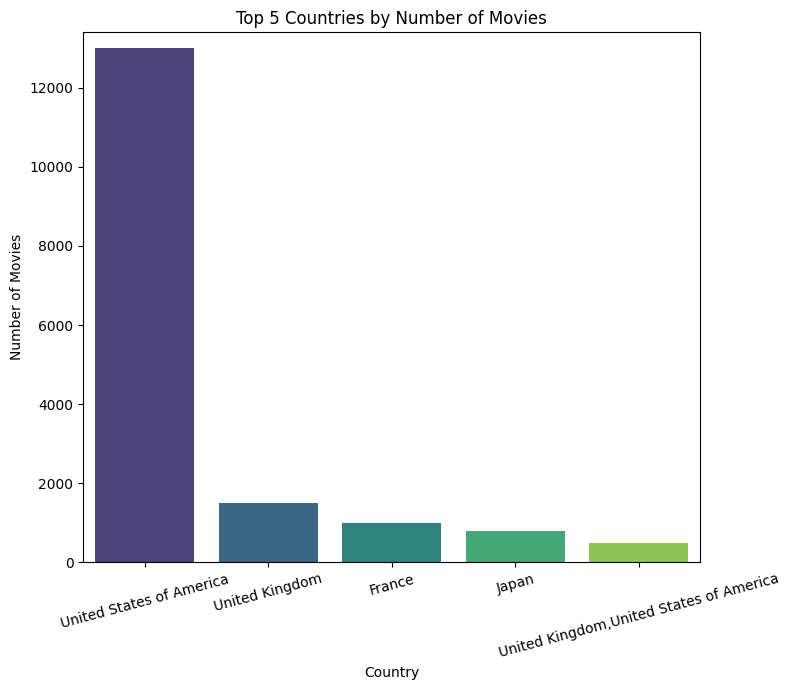

In [ ]:
top_countries_df = top_countries.reset_index()
plt.figure(figsize=(8,7))
sns.barplot(data=top_countries_df, x='country_name', y='movie_id', palette='viridis')
plt.title('Top 5 Countries by Number of Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=15)
plt.tight_layout()
plt.ylim(0,13400)
plt.show()

In [ ]:
company_revenue=movies_metadata_cleaned.groupby('company_names')['revenue'].sum().sort_values(ascending=False).tail(3)
display(company_revenue)

,revenue
company_names,
Starway International Inc.,-13921065.85
Future Films,-15597444.80
Eve Productions,-23156234.39


(array([0, 1, 2]),
 [Text(0, 0, 'Starway International Inc.'),
  Text(1, 0, 'Future Films'),
  Text(2, 0, 'Eve Productions')])

<Figure size 1000x700 with 0 Axes>

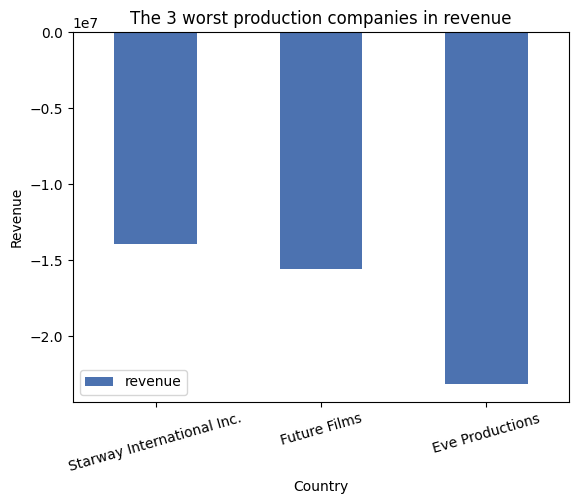

In [ ]:
company_revenue2 = company_revenue.reset_index()
plt.figure(figsize=(10,7))
company_revenue2.plot(kind='bar', x='company_names', y='revenue')
plt.title('The 3 worst production companies in revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=16)

Text(0.5, 0, 'Vote Average')

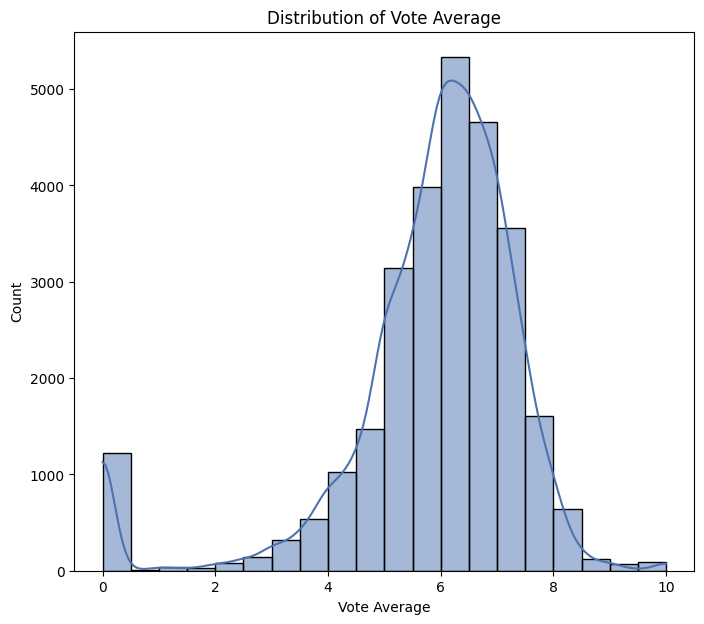

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(data=movies_metadata_cleaned, x='vote_average', bins=20, kde=True)
custom_green_palette = [
    "#002820",  # Darkest
    "#004030",  # Original
    "#166050",  # Medium Dark
    "#2E806F",  # Medium
    "#5FAE9D",  # Light Medium
    "#8FD6C9",  # Light
    "#C1ECE5"   # Lightest
]
sns.set_palette(custom_green_palette)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')

In [ ]:
movies_metadata_cleaned['release_date']=pd.to_datetime(movies_metadata_cleaned['release_date'])

In [ ]:
movies_metadata_cleaned['release_date'].dt.year.value_counts()
movies_metadata_cleaned['release_year']=movies_metadata_cleaned['release_date'].dt.year

In [ ]:
top_5_years_by_revenue = movies_metadata_cleaned.groupby('release_year')['revenue'].sum().sort_values(ascending=False).head(5)



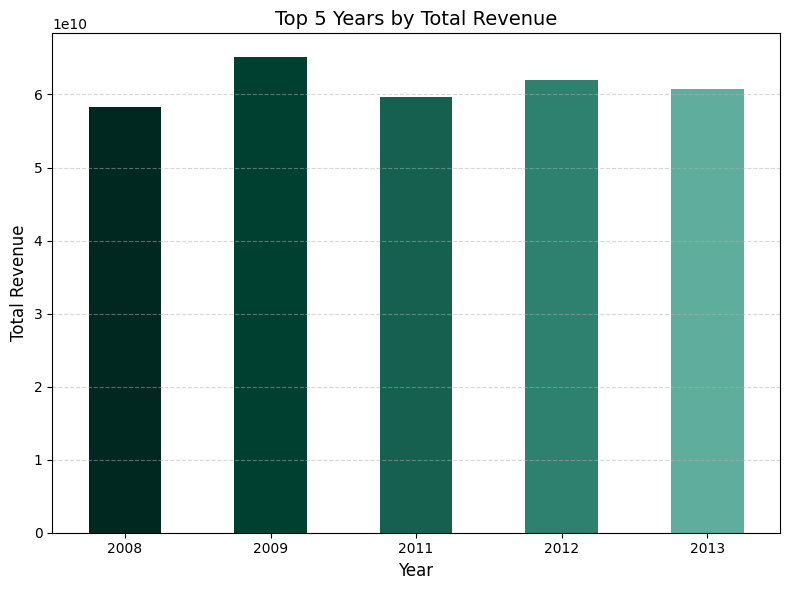

In [ ]:

plt.figure(figsize=(8, 6))
custom_green_palette = [
    "#002820",  # Darkest
    "#004030",  # Original
    "#166050",  # Medium Dark
    "#2E806F",  # Medium
    "#5FAE9D",  # Light Medium
    "#8FD6C9",  # Light
    "#C1ECE5"   # Lightest
]
top_5_years_by_revenue.sort_index().plot(kind='bar',color=custom_green_palette)
plt.title('Top 5 Years by Total Revenue', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
top_types =movies_metadata_cleaned.groupby('type')['vote_average'].mean().sort_values(ascending=False).head(5)

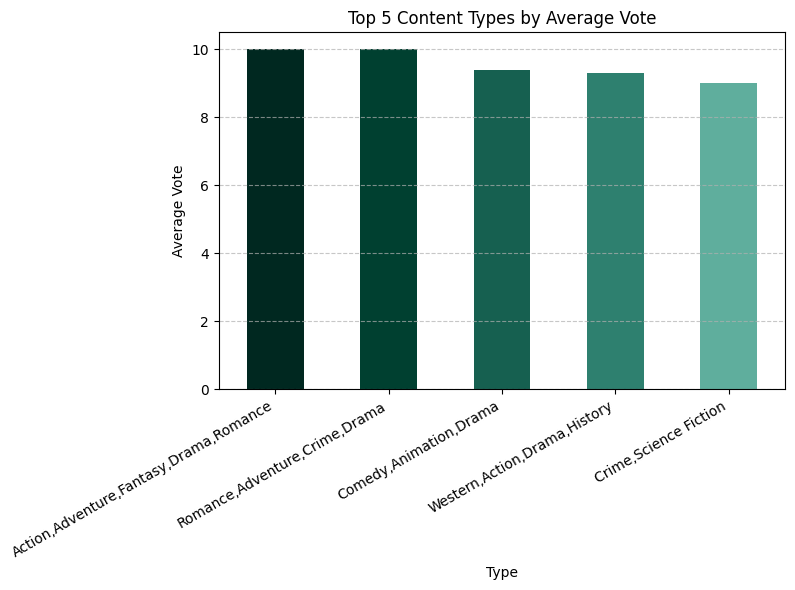

In [ ]:
plt.figure(figsize=(8, 6))
top_types.plot(kind='bar',color=custom_green_palette)
plt.title('Top 5 Content Types by Average Vote')
plt.xlabel('Type')
plt.ylabel('Average Vote')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
